# Data Analysis

Ashley Feiler, aef56@pitt.edu

New continuing from Compiling Data

## Imports

In [1]:
import pickle
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now to unpickle the dataframe I compiled from before, and I'll run through some basic stats just as a reminder.

In [2]:
f = open('/Users/ashleyfeiler/Documents/data_science/Goodreads-Genre-Reviews-Analysis/data/analysis_df.pkl', 'rb')  
df = pickle.load(f)     
f.close()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28274 entries, 0 to 28273
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Text           28274 non-null  object 
 1   Rating         28274 non-null  int64  
 2   Title          28274 non-null  object 
 3   Author         28274 non-null  object 
 4   Category       28274 non-null  object 
 5   Genres         28274 non-null  object 
 6   Language       28274 non-null  object 
 7   Pages          28274 non-null  object 
 8   Pub_Year       28274 non-null  object 
 9   Avg_Rating     28274 non-null  float64
 10  Ratings_Count  28274 non-null  int64  
 11  Toks           28274 non-null  object 
 12  Toks_Lower     28274 non-null  object 
 13  Tok_Count      28274 non-null  int64  
 14  Avg_Word_Len   28118 non-null  float64
 15  Sents          28274 non-null  object 
 16  Sents_Count    28274 non-null  int64  
 17  Avg_Sent_Len   28274 non-null  float64
 18  Nonsen

Looks like the right amount of entries, but 22 columns is a lot, so I'm going to cut these down just a bit and shorten some of the column names. I'm going to remove the 'Genres' column, which lists all the genre tags associated with a book, and rename 'Category' to 'Genre' - sticking with just its original category is good enough for now. I'm also going to eliminate publication year since I don't think that information is necessary, and the Sents columns because I have the original and tokenized text as well as the count and average sentence length, so I don't need to hold onto the sentence-tokenized version.

In [4]:
df = df[['Text', 'Rating', 'Title', 'Author', 'Category', 'Language',
       'Pages', 'Avg_Rating', 'Ratings_Count', 'Toks',
       'Toks_Lower', 'Tok_Count', 'Avg_Word_Len', 'Sents_Count',
       'Avg_Sent_Len', 'Nonsense', 'Sentiment_Num', 'Sentiment_Tag', 'Adjs',
       'Adjs_Count']]
df.columns = ['Text', 'Rating', 'Title', 'Author', 'Genre', 'Lang',
       'Pages', 'Avg_Rating', 'Ratings_Count', 'Toks',
       'Toks_Low', 'Tok_Count', 'Avg_Word_Len', 'Sents_Count',
       'Avg_Sent_Len', 'Nonsense', 'Sentiment_Num', 'Sentiment_Tag', 'Adjs',
       'Adjs_Count']

In [5]:
print(df.shape)
df.head(0)

(28274, 20)


,Text,Rating,Title,Author,Genre,Lang,Pages,Avg_Rating,Ratings_Count,Toks,Toks_Low,Tok_Count,Avg_Word_Len,Sents_Count,Avg_Sent_Len,Nonsense,Sentiment_Num,Sentiment_Tag,Adjs,Adjs_Count


Now all of the columns (19 excluding the index) are visible! Now for all the numerical values, I'm going to compare the descriptive statistics by genre.

## Descriptive Stats by Genre

In [6]:
df.columns

Index(['Text', 'Rating', 'Title', 'Author', 'Genre', 'Lang', 'Pages',
       'Avg_Rating', 'Ratings_Count', 'Toks', 'Toks_Low', 'Tok_Count',
       'Avg_Word_Len', 'Sents_Count', 'Avg_Sent_Len', 'Nonsense',
       'Sentiment_Num', 'Sentiment_Tag', 'Adjs', 'Adjs_Count'],
      dtype='object')

In [7]:
df.groupby('Genre').Rating.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,3.904829,1.203209,0.0,3.0,4.0,5.0,5.0
comics_graphic,3505.0,3.811412,1.153754,0.0,3.0,4.0,5.0,5.0
fantasy_paranormal,4323.0,3.816100,1.246819,0.0,3.0,4.0,5.0,5.0
history_bio,3362.0,3.851279,1.215740,0.0,3.0,4.0,5.0,5.0
mystery_thriller_crime,3789.0,3.727105,1.178367,0.0,3.0,4.0,5.0,5.0
poetry,2185.0,3.897941,1.276413,0.0,3.0,4.0,5.0,5.0
romance,3918.0,3.943849,1.212399,0.0,3.0,4.0,5.0,5.0
ya,4334.0,3.781034,1.272587,0.0,3.0,4.0,5.0,5.0


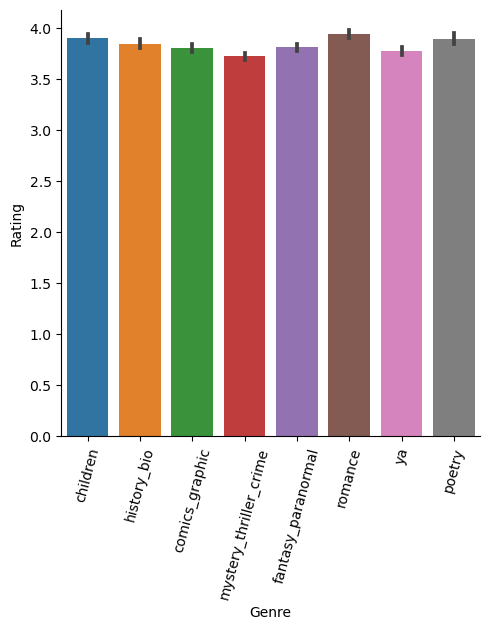

In [8]:
sns.catplot(data=df, x='Genre', y='Rating', kind='bar')
plt.xticks(rotation=75)
plt.show()

In [9]:
genre_list = list(df.Genre.unique())
genre_list

['children',
 'history_bio',
 'comics_graphic',
 'mystery_thriller_crime',
 'fantasy_paranormal',
 'romance',
 'ya',
 'poetry']

In [10]:
from scipy import stats
significance_tests = []

In [11]:
children_rating = df[(df.Genre == 'children')].Rating
hist_rating = df[(df.Genre == 'history_bio')].Rating
comics_rating = df[(df.Genre == 'comics_graphic')].Rating
mystery_rating = df[(df.Genre == 'mystery_thriller_crime')].Rating
fantasy_rating = df[(df.Genre == 'fantasy_paranormal')].Rating
romance_rating = df[(df.Genre == 'romance')].Rating
ya_rating = df[(df.Genre == 'ya')].Rating                    
poetry_rating = df[(df.Genre == 'poetry')].Rating

rating_test = stats.f_oneway(children_rating, hist_rating, comics_rating, mystery_rating, fantasy_rating, romance_rating, ya_rating, poetry_rating)
print(rating_test)

significance_tests.append(('Rating', rating_test))

F_onewayResult(statistic=12.486821345314613, pvalue=4.471076138185445e-16)


In [12]:
df.groupby('Genre').Avg_Rating.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,4.037768,0.263286,2.17,3.89,4.05,4.21,5.00
comics_graphic,3505.0,4.021680,0.327196,2.25,3.84,4.07,4.24,4.83
fantasy_paranormal,4323.0,4.014464,0.299743,2.40,3.82,4.03,4.23,5.00
history_bio,3362.0,3.943968,0.283527,2.42,3.77,3.96,4.14,5.00
mystery_thriller_crime,3789.0,3.884130,0.268984,1.98,3.74,3.90,4.06,4.88
poetry,2185.0,4.096256,0.280143,2.66,3.95,4.12,4.26,5.00
romance,3918.0,4.000403,0.279388,2.50,3.83,4.03,4.20,4.91
ya,4334.0,3.979213,0.280267,2.86,3.80,4.00,4.17,5.00


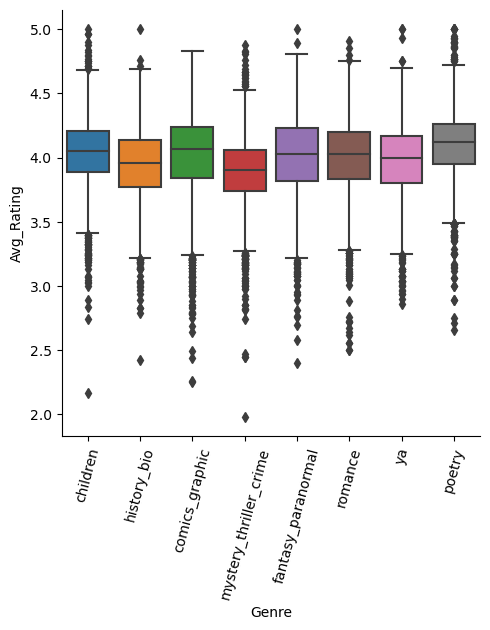

In [13]:
sns.catplot(data=df, x='Genre', y='Avg_Rating', kind='box')
plt.xticks(rotation=75)
plt.show()

In [14]:
df.groupby('Genre').Ratings_Count.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,93980.546186,275095.225792,1.0,330.0,3001.5,31387.00,1876252.0
comics_graphic,3505.0,16528.807703,41517.096041,1.0,479.0,2705.0,12834.00,406669.0
fantasy_paranormal,4323.0,108879.451076,375846.839796,1.0,838.5,7755.0,55039.00,4765497.0
history_bio,3362.0,96545.556217,342835.065977,0.0,592.0,4165.0,30058.75,3255518.0
mystery_thriller_crime,3789.0,59168.214568,210601.102517,1.0,522.0,3984.0,22034.00,2046499.0
poetry,2185.0,44478.507551,151734.841123,0.0,148.0,1433.0,15270.00,1029527.0
romance,3918.0,32528.685299,143318.963490,1.0,333.0,1878.5,10393.00,2078406.0
ya,4334.0,211864.244347,652314.359248,1.0,2863.5,19151.0,106182.00,4899965.0


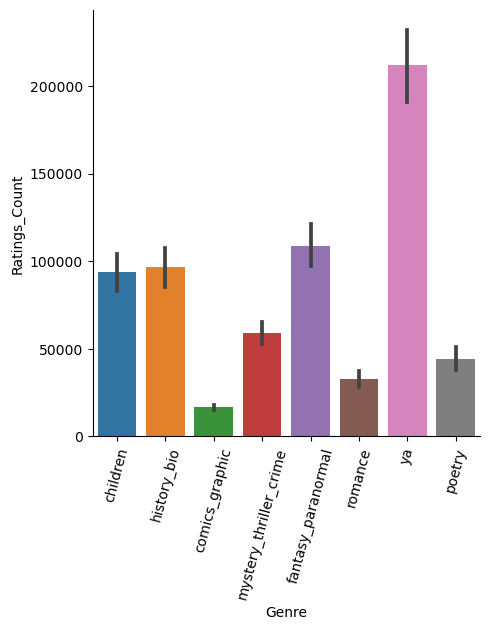

In [15]:
sns.catplot(data=df, x='Genre', y='Ratings_Count', kind='bar')
plt.xticks(rotation=75)
plt.show()

In [16]:
df.groupby('Genre').Tok_Count.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,90.446816,139.108835,1.0,19.0,45.0,101.00,2125.0
comics_graphic,3505.0,106.672183,160.568479,1.0,21.0,52.0,125.00,2877.0
fantasy_paranormal,4323.0,155.552625,216.315288,1.0,29.0,74.0,194.00,3803.0
history_bio,3362.0,147.559786,206.849123,1.0,31.0,75.0,177.00,2566.0
mystery_thriller_crime,3789.0,131.375033,184.020798,1.0,27.0,68.0,163.00,3924.0
poetry,2185.0,117.654005,218.564554,1.0,21.0,53.0,122.00,4159.0
romance,3918.0,161.168453,211.403155,1.0,30.0,80.0,209.75,2110.0
ya,4334.0,163.730964,231.898532,1.0,27.0,74.0,202.75,2840.0


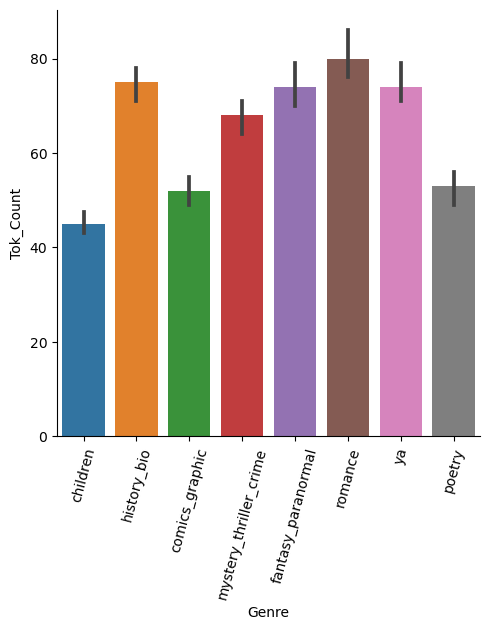

In [17]:
sns.catplot(data=df, x='Genre', y='Tok_Count', kind='bar', estimator=np.median)
plt.xticks(rotation=75)
plt.show()

In [18]:
children_toks = df[(df.Genre == 'children')].Tok_Count
hist_tokts = df[(df.Genre == 'history_bio')].Tok_Count
comics_toks = df[(df.Genre == 'comics_graphic')].Tok_Count
mystery_toks = df[(df.Genre == 'mystery_thriller_crime')].Tok_Count
fantasy_toks = df[(df.Genre == 'fantasy_paranormal')].Tok_Count
romance_toks = df[(df.Genre == 'romance')].Tok_Count
ya_toks = df[(df.Genre == 'ya')].Tok_Count                    
poetry_toks = df[(df.Genre == 'poetry')].Tok_Count

toks_test = stats.f_oneway(children_toks, hist_tokts, comics_toks, mystery_toks, fantasy_toks, romance_toks, ya_toks, poetry_toks)
print(toks_test)

significance_tests.append(('Tok_Count', toks_test))

F_onewayResult(statistic=62.70663917469326, pvalue=5.454203218430883e-90)


In [19]:
df.groupby('Genre').Avg_Word_Len.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2853.0,4.340696,0.730856,1.0,4.000000,4.285714,4.588235,11.5
comics_graphic,3474.0,4.386348,0.734120,1.0,4.036707,4.303751,4.609491,13.0
fantasy_paranormal,4302.0,4.264760,0.676670,1.0,3.968561,4.208661,4.461538,16.0
history_bio,3351.0,4.462218,0.752794,1.0,4.116614,4.382353,4.666667,16.0
mystery_thriller_crime,3774.0,4.365714,0.710656,1.0,4.035714,4.287096,4.585641,14.0
poetry,2174.0,4.451231,0.827943,1.0,4.048611,4.344400,4.684475,13.0
romance,3891.0,4.207006,0.613127,1.0,3.941284,4.160714,4.389480,16.0
ya,4299.0,4.234958,0.687662,1.0,3.947317,4.171334,4.428571,15.0


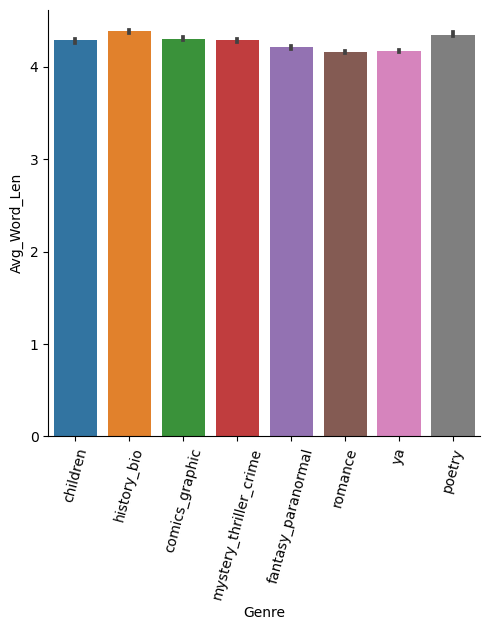

In [20]:
sns.catplot(data=df, x='Genre', y='Avg_Word_Len', kind='bar', estimator=np.median)
plt.xticks(rotation=75)
plt.show()

In [21]:
children_words = df[(df.Genre == 'children')].Avg_Word_Len
hist_words = df[(df.Genre == 'history_bio')].Avg_Word_Len
comics_words = df[(df.Genre == 'comics_graphic')].Avg_Word_Len
mystery_words = df[(df.Genre == 'mystery_thriller_crime')].Avg_Word_Len
fantasy_words = df[(df.Genre == 'fantasy_paranormal')].Avg_Word_Len
romance_words = df[(df.Genre == 'romance')].Avg_Word_Len
ya_words = df[(df.Genre == 'ya')].Avg_Word_Len                    
poetry_words = df[(df.Genre == 'poetry')].Avg_Word_Len

wordlen_test = stats.f_oneway(children_words, hist_words, comics_words, mystery_words, fantasy_words, romance_words, ya_words, poetry_words)
print(wordlen_test)

significance_tests.append(('Avg_Word_Len', wordlen_test))

F_onewayResult(statistic=nan, pvalue=nan)


In [22]:
df.groupby('Genre').Sents_Count.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,5.051784,6.312488,1.0,2.0,3.0,6.0,109.0
comics_graphic,3505.0,5.674750,7.257126,1.0,2.0,3.0,7.0,166.0
fantasy_paranormal,4323.0,8.613232,11.204685,1.0,2.0,5.0,10.0,179.0
history_bio,3362.0,7.389054,9.141050,1.0,2.0,4.0,9.0,89.0
mystery_thriller_crime,3789.0,7.115862,9.080802,1.0,2.0,4.0,9.0,174.0
poetry,2185.0,6.077346,10.417738,1.0,2.0,3.0,6.0,196.0
romance,3918.0,9.147269,11.045130,1.0,2.0,5.0,11.0,129.0
ya,4334.0,9.293263,12.855068,1.0,2.0,5.0,11.0,210.0


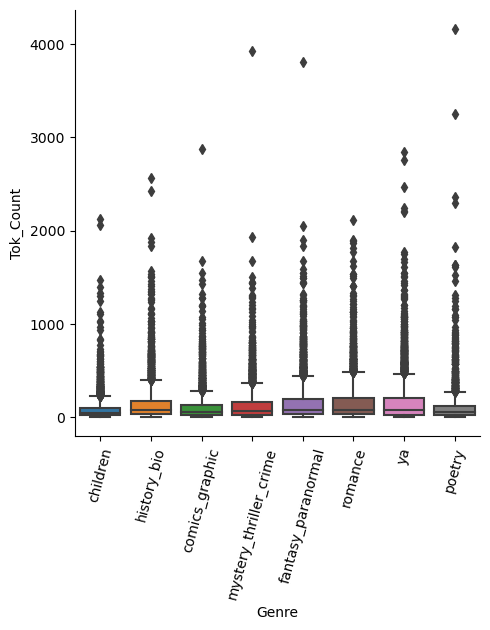

In [23]:
sns.catplot(data=df, x='Genre', y='Tok_Count', kind='box')
plt.xticks(rotation=75)
plt.show()

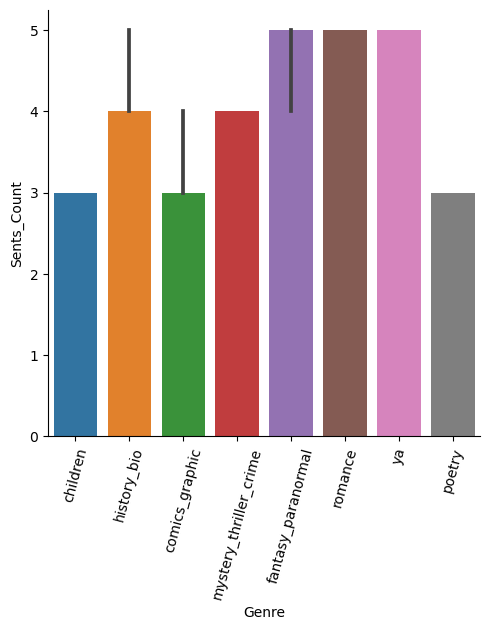

In [24]:
sns.catplot(data=df, x='Genre', y='Sents_Count', kind='bar', estimator=np.median)
plt.xticks(rotation=75)
plt.show()

In [25]:
children_sents = df[(df.Genre == 'children')].Sents_Count
hist_sents = df[(df.Genre == 'history_bio')].Sents_Count
comics_sents = df[(df.Genre == 'comics_graphic')].Sents_Count
mystery_sents = df[(df.Genre == 'mystery_thriller_crime')].Sents_Count
fantasy_sents = df[(df.Genre == 'fantasy_paranormal')].Sents_Count
romance_sents = df[(df.Genre == 'romance')].Sents_Count
ya_sents = df[(df.Genre == 'ya')].Sents_Count                    
poetry_sents = df[(df.Genre == 'poetry')].Sents_Count

sents_test = stats.f_oneway(children_sents, hist_sents, comics_sents, mystery_sents, fantasy_sents, romance_sents, ya_sents, poetry_sents)
print(sents_test)

significance_tests.append(('Sents_Count', sents_test))

F_onewayResult(statistic=89.83089407728102, pvalue=4.4958483393898035e-130)


In [26]:
df.groupby('Genre').Avg_Sent_Len.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,15.537847,9.062199,1.0,10.000000,15.000000,19.770833,262.0
comics_graphic,3505.0,16.377889,9.950796,1.0,10.000000,15.666667,21.200000,258.0
fantasy_paranormal,4323.0,16.622772,11.694261,1.0,11.000000,15.666667,20.600000,388.0
history_bio,3362.0,18.155799,11.226322,1.0,12.333333,17.333333,22.500000,267.0
mystery_thriller_crime,3789.0,16.674117,8.788095,1.0,11.250000,15.900000,21.000000,150.0
poetry,2185.0,17.418711,11.402050,1.0,10.666667,16.000000,21.986486,173.0
romance,3918.0,16.011992,9.643031,1.0,10.500000,15.162281,20.000000,195.0
ya,4334.0,16.034264,9.668900,1.0,10.200000,15.170290,20.000000,205.0


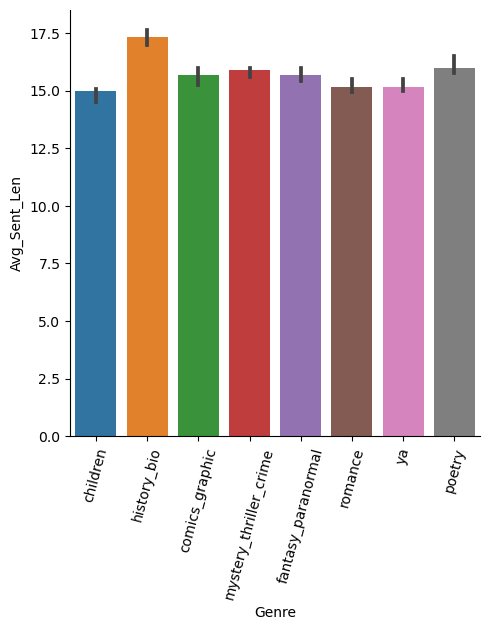

In [27]:
sns.catplot(data=df, x='Genre', y='Avg_Sent_Len', kind='bar', estimator=np.median)
plt.xticks(rotation=75)
plt.show()

In [28]:
children_sents_len = df[(df.Genre == 'children')].Avg_Sent_Len
hist_sents_len = df[(df.Genre == 'history_bio')].Avg_Sent_Len
comics_sents_len = df[(df.Genre == 'comics_graphic')].Avg_Sent_Len
mystery_sents_len = df[(df.Genre == 'mystery_thriller_crime')].Avg_Sent_Len
fantasy_sents_len = df[(df.Genre == 'fantasy_paranormal')].Avg_Sent_Len
romance_sents_len = df[(df.Genre == 'romance')].Avg_Sent_Len
ya_sents_len = df[(df.Genre == 'ya')].Avg_Sent_Len                    
poetry_sents_len = df[(df.Genre == 'poetry')].Avg_Sent_Len

sentlen_test = stats.f_oneway(children_sents_len, hist_sents_len, comics_sents_len, mystery_sents_len, fantasy_sents_len, romance_sents_len, ya_sents_len, poetry_sents_len)
print(sentlen_test)

significance_tests.append(('Avg_Sent_Len', sentlen_test))


F_onewayResult(statistic=21.570377954827823, pvalue=3.031378324654984e-29)


In [29]:
df.groupby('Genre').Nonsense.value_counts().unstack()

Nonsense,nonsense,real,short
Genre,,,
children,37,2785,36
comics_graphic,68,3367,70
fantasy_paranormal,107,4154,62
history_bio,60,3267,35
mystery_thriller_crime,65,3688,36
poetry,50,2109,26
romance,101,3739,78
ya,147,4110,77


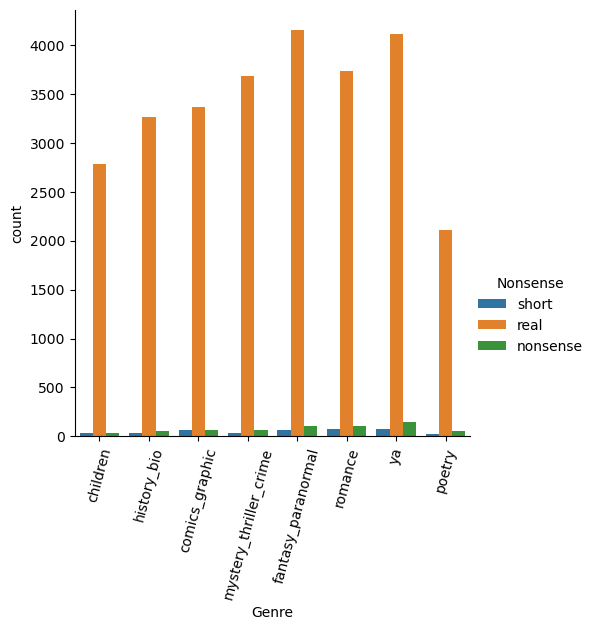

In [30]:
sns.catplot(x='Genre', hue='Nonsense', kind='count', data=df)
plt.xticks(rotation=75)
plt.show()

In [31]:
df.groupby('Genre').Sentiment_Num.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,0.312205,0.269940,-0.7268,0.126007,0.322476,0.507945,0.9784
comics_graphic,3505.0,0.234623,0.290222,-0.8951,0.006133,0.235900,0.439575,0.9780
fantasy_paranormal,4323.0,0.230441,0.258301,-0.8786,0.045948,0.222129,0.400613,0.9796
history_bio,3362.0,0.228653,0.277431,-0.9371,0.036689,0.221982,0.408325,0.9669
mystery_thriller_crime,3789.0,0.178113,0.280476,-0.9493,0.000000,0.165780,0.354567,0.9776
poetry,2185.0,0.242418,0.284537,-0.9078,0.025800,0.242675,0.426777,0.9827
romance,3918.0,0.260603,0.255257,-0.8074,0.087634,0.253128,0.430965,0.9801
ya,4334.0,0.216405,0.259816,-0.8897,0.025913,0.205384,0.376661,0.9903


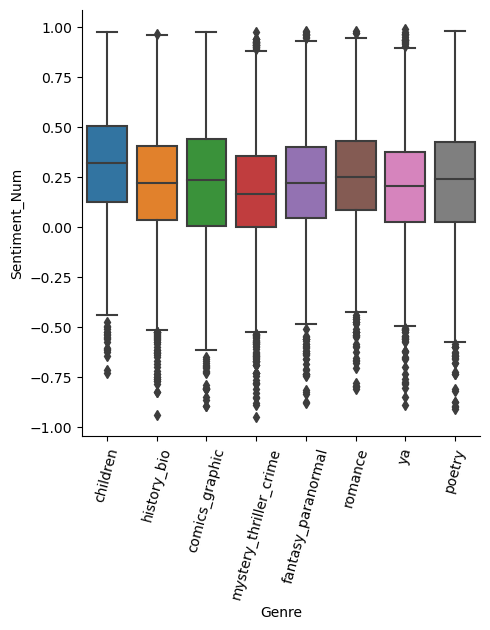

In [32]:
sns.catplot(x='Genre', y='Sentiment_Num', kind='box', data=df)
plt.xticks(rotation=75)
plt.show()

In [33]:
children_pos_num = df[(df.Genre == 'children')].Sentiment_Num
hist_pos_num = df[(df.Genre == 'history_bio')].Sentiment_Num
comics_pos_num = df[(df.Genre == 'comics_graphic')].Sentiment_Num
mystery_pos_num = df[(df.Genre == 'mystery_thriller_crime')].Sentiment_Num
fantasy_pos_num = df[(df.Genre == 'fantasy_paranormal')].Sentiment_Num
romance_pos_num = df[(df.Genre == 'romance')].Sentiment_Num
ya_pos_num = df[(df.Genre == 'ya')].Sentiment_Num                    
poetry_pos_num = df[(df.Genre == 'poetry')].Sentiment_Num

posnum_test = stats.f_oneway(children_pos_num, hist_pos_num, comics_pos_num, mystery_pos_num, fantasy_pos_num, romance_pos_num, ya_pos_num, poetry_pos_num)
print(posnum_test)

significance_tests.append(('Sentiment_Num', posnum_test))

F_onewayResult(statistic=65.66681131812767, pvalue=2.2733011670047155e-94)


In [34]:
df.groupby('Genre').Sentiment_Tag.value_counts().unstack()

Sentiment_Tag,negative,neutral,positive
Genre,,,
children,282,174,2402
comics_graphic,572,291,2642
fantasy_paranormal,594,294,3435
history_bio,552,173,2637
mystery_thriller_crime,831,207,2751
poetry,293,210,1682
romance,425,239,3254
ya,640,313,3381


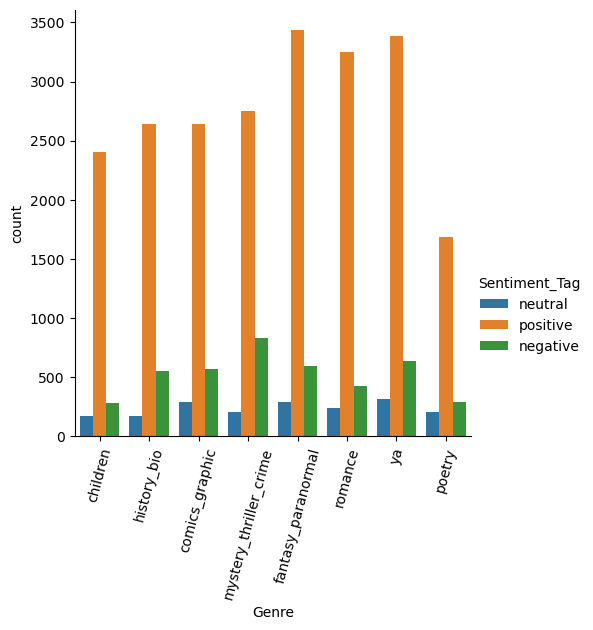

In [35]:
sns.catplot(x='Genre', hue='Sentiment_Tag', kind='count', data=df)
plt.xticks(rotation=75)
plt.show()

In [36]:
df.groupby('Genre').Adjs_Count.describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
children,2858.0,6.694192,9.726119,0.0,1.0,4.0,8.0,114.0
comics_graphic,3505.0,8.433381,12.010064,0.0,2.0,5.0,10.0,178.0
fantasy_paranormal,4323.0,11.131853,15.379142,0.0,2.0,6.0,14.0,290.0
history_bio,3362.0,10.786139,15.317713,0.0,2.0,6.0,13.0,211.0
mystery_thriller_crime,3789.0,9.256268,12.243096,0.0,2.0,5.0,12.0,204.0
poetry,2185.0,8.412357,14.360697,0.0,1.0,4.0,9.0,254.0
romance,3918.0,10.979326,14.161288,0.0,2.0,6.0,14.0,152.0
ya,4334.0,11.438856,16.253241,0.0,2.0,6.0,14.0,189.0


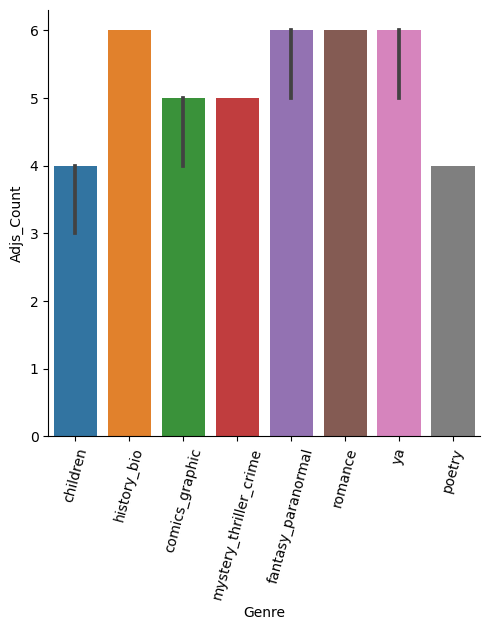

In [37]:
sns.catplot(x='Genre', y='Adjs_Count', kind='bar', estimator=np.median, data=df)
plt.xticks(rotation=75)
plt.show()

In [38]:
children_adjs = df[(df.Genre == 'children')].Adjs_Count
hist_adjs = df[(df.Genre == 'history_bio')].Adjs_Count
comics_adjs = df[(df.Genre == 'comics_graphic')].Adjs_Count
mystery_adjs = df[(df.Genre == 'mystery_thriller_crime')].Adjs_Count
fantasy_adjs = df[(df.Genre == 'fantasy_paranormal')].Adjs_Count
romance_adjs = df[(df.Genre == 'romance')].Adjs_Count
ya_adjs = df[(df.Genre == 'ya')].Adjs_Count                    
poetry_adjs = df[(df.Genre == 'poetry')].Adjs_Count

adjs_test = stats.f_oneway(children_adjs, hist_adjs, comics_adjs, mystery_adjs, fantasy_adjs, romance_adjs, ya_adjs, poetry_adjs)
print(adjs_test)

significance_tests.append(('Adjs_Count', adjs_test))

F_onewayResult(statistic=49.115488419623034, pvalue=7.13367352726981e-70)


In [45]:
for (feature, stats) in significance_tests:
    print(feature + ":\n" + str(stats) + "\n")

Rating:
F_onewayResult(statistic=12.486821345314613, pvalue=4.471076138185445e-16)

Tok_Count:
F_onewayResult(statistic=62.70663917469326, pvalue=5.454203218430883e-90)

Avg_Word_Len:
F_onewayResult(statistic=nan, pvalue=nan)

Sents_Count:
F_onewayResult(statistic=89.83089407728102, pvalue=4.4958483393898035e-130)

Avg_Sent_Len:
F_onewayResult(statistic=21.570377954827823, pvalue=3.031378324654984e-29)

Sentiment_Num:
F_onewayResult(statistic=65.66681131812767, pvalue=2.2733011670047155e-94)

Adjs_Count:
F_onewayResult(statistic=49.115488419623034, pvalue=7.13367352726981e-70)



## Machine Learning

### Naive Bayes Classifier (Categorical) 

### Clustering

In [ ]:
import sklearn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.5, stop_words='english')

x = df['Text']
y = df['Genre']

x_tfidf = tfidf_model.fit_transform(x, y)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=2)         
x_svd = svd_model.fit_transform(x_tfidf,y)

In [ ]:
cdict = {'children':'blue', 'history_bio':'orange', 'comics_graphic':'green', 'mystery_thriller_crime':'red',
        'fantasy_paranormal':'purple', 'romance':'brown', 'ya':'pink', 'poetry':'gray'}
colors = y.map(cdict)

plt.figure(figsize=(8,4))
plt.scatter(x_svd[:, 0], x_svd[:, 1], c=colors)  
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# custom function for print out topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

documents = df.Text

num_feats = 1000
num_tops = 8

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_feats, stop_words='english')
tfidf_docs = tfidf_vectorizer.fit_transform(documents)

# Run NMF
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5, 
                init='nndsvd').fit(tfidf_docs)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 10)

In [46]:
df.head()

,Text,Rating,Title,Author,Genre,Lang,Pages,Avg_Rating,Ratings_Count,Toks,Toks_Low,Tok_Count,Avg_Word_Len,Sents_Count,Avg_Sent_Len,Nonsense,Sentiment_Num,Sentiment_Tag,Adjs,Adjs_Count
0,O,0,Xander's Panda Party,Linda Sue Park,children,eng,40,4.05,1163,[O],[o],1,1.000000,1,1.0,short,0.00000,neutral,[],0
1,my pick for the caldecott so far...,5,Xander's Panda Party,Linda Sue Park,children,eng,40,4.05,1163,"[my, pick, for, the, caldecott, so, far, ...]","[my, pick, for, the, caldecott, so, far, ...]",8,3.714286,1,8.0,real,0.00000,neutral,[],0
2,This time Dan and Amy go to the Bahamas and Ja...,4,"Storm Warning (The 39 Clues, #9)",Linda Sue Park,children,eng,190,3.98,39904,"[This, time, Dan, and, Amy, go, to, the, Baham...","[this, time, dan, and, amy, go, to, the, baham...",35,4.176471,2,17.5,real,0.15910,positive,"[(next, JJ)]",1
3,"Loved the excerpts where Julia, the main chara...",5,Project Mulberry,Linda Sue Park,children,eng,240,3.67,2929,"[Loved, the, excerpts, where, Julia, ,, the, m...","[loved, the, excerpts, where, julia, ,, the, m...",18,5.000000,1,18.0,real,0.59940,positive,"[(main, JJ)]",1
4,"I liked the illustrations, which are are - wel...",4,A Moon of My Own,Jennifer Rustgi,children,eng,32,3.78,84,"[I, liked, the, illustrations, ,, which, are, ...","[i, liked, the, illustrations, ,, which, are, ...",153,4.484375,5,30.6,real,0.44342,positive,"[(luminous, JJ), (more, JJR), (mundane, JJ), (...",10


## Summary

In [47]:
df_test = df.head()

In [48]:
df_test.Adjs.value_counts()

[]                                                                                                                                                  2
[(next, JJ)]                                                                                                                                        1
[(main, JJ)]                                                                                                                                        1
[(luminous, JJ), (more, JJR), (mundane, JJ), (trite, JJ), (poetic, JJ), (back, JJ), (useful, JJ), (informative, JJ), (full, JJ), (unlikely, JJ)]    1
Name: Adjs, dtype: int64

In [57]:
def extract_adjs(adj_list):
    new_adj_list = []
    for (adj, code) in adj_list:
        new_adj_list.append(adj)
    return new_adj_list

In [58]:
df_test['Adjs'] = df_test.Adjs.map(extract_adjs)

/var/folders/j9/9lmff3zj6bxgfpsb8gm8pjrw0000gn/T/ipykernel_36463/760216279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Adjs'] = df_test.Adjs.map(extract_adjs)


In [60]:
df_test.Adjs

0                                                   []
1                                                   []
2                                               [next]
3                                               [main]
4    [luminous, more, mundane, trite, poetic, back,...
Name: Adjs, dtype: object

In [61]:
df['Adjs'] = df.Adjs.map(extract_adjs)

TypeError: unhashable type: 'list'